# Assignment 1: k-Nearest Neighbors
### ip222gs

## Exercise 3: MNIST k-NN classification (VG Exercise)

In [59]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['pcolor.shading'] ='nearest'

In [60]:
# read train data csv and save output as numpy array
df_train = np.loadtxt('mnist_train.csv', delimiter=',', skiprows=1)
# shuffle the rows
np.random.shuffle(df_train)

In [61]:
# read train data csv and save output as numpy array
df_test = np.loadtxt('mnist_test.csv', delimiter=',', skiprows=1)
# shuffle the rows
np.random.shuffle(df_test)

In [62]:
# define features and label data
X_train = df_train[:, 1:]
y_train = df_train[:, 0]
X_test  = df_test[:, 1:]
y_test  = df_test[:, 0]

In [63]:
# summarize loaded dataset
'''
https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
'''

print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 784), y=(60000,)
Test: X=(10000, 784), y=(10000,)


In [64]:
np.sqrt(sum(np.square(X_train - X_test[0,:]))).reshape(-1,1).shape

(784, 1)

In [65]:
np.sqrt(np.sum((np.square(X_train - X_test[0,:])), axis=1)).shape

(60000,)

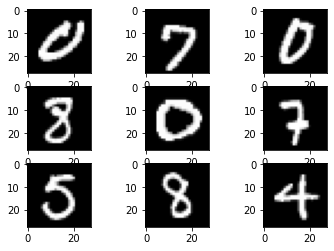

In [66]:
# show 1st 9 pictures
'''
https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
'''

for i in range(9):
	image = X_train[i].reshape(28,28)
	plt.subplot(330 + 1 + i)
	plt.imshow(image, cmap="gray")

In [67]:
# Function to find k nearest neighbors to given data point and return the predicted class

def k_nearest_neighbors(number, k=1):
    global X_train, df_train
    number = number
    # Calculate the distance between point given array and each row in the training data.
    dist = np.sqrt(np.sum(np.square(X_train - number), axis=1)).reshape(-1,1)

    # Create a new array with distances and add it to the existing array
    data = np.concatenate((df_train, dist), axis = 1)

    # Sort the calculated distances in ascending order based on distance values
    data_sorted = data[np.argsort(data[:, 785])]

    # Get top k rows from the sorted list
    data_top_k = data_sorted[:k]

    # Get the most frequent class of these rows
    '''
    using the proposal given here: 
    https://stackoverflow.com/questions/16330831/most-efficient-way-to-find-mode-in-numpy-array
    '''
    values,counts = np.unique(data_top_k[:,0], return_counts=True)
    index = np.argmax(counts)
    return values[index]

In [68]:
#  function to apply knn_classification to the complete array

def knn_class(data, k_neigh):
    return [k_nearest_neighbors(item, k=k_neigh) for item in data]

In [69]:
# function to calculate number of training errors
def training_error(y_act, y_pred):
    return sum(y_act[i] != y_pred[i] for i in range(len(y_act)))

In [70]:
# apply function to calculate predicated class based on actual test values and k number of neighbours in range (1, 3, 5, 7)
y_pred_class_1 = np.vstack(knn_class(X_test, 1))
y_pred_class_3 = np.vstack(knn_class(X_test, 3))
y_pred_class_5 = np.vstack(knn_class(X_test, 5))
y_pred_class_7 = np.vstack(knn_class(X_test, 7))

In [71]:
#print training error for difefrent values of k
print(f' at k = 1 there are {training_error(y_test, y_pred_class_1)[0]} training erros out of {len(y_test)} values')
print(f' at k = 3 there are {training_error(y_test, y_pred_class_3)[0]} training erros out of {len(y_test)} values')
print(f' at k = 5 there are {training_error(y_test, y_pred_class_5)[0]} training erros out of {len(y_test)} values')
print(f' at k = 7 there are {training_error(y_test, y_pred_class_7)[0]} training erros out of {len(y_test)} values')

 at k = 1 there are 309 training erros out of 10000 values
 at k = 3 there are 295 training erros out of 10000 values
 at k = 5 there are 312 training erros out of 10000 values
 at k = 7 there are 306 training erros out of 10000 values


Current data shows that at k = 5 one could expect 44 training errors out of 1000 dataset, which follows to 95.6% training accuracy.
Further algoritm optimization is needed in order to achieve better prediction quality